# Данилов Фёдор, 151004

# Лабораторная работа №2

## 1. Импортировать датасет

In [34]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import mode

import warnings
warnings.filterwarnings('ignore')

In [35]:
#import dataset from csv
DATASET_PATH = "./fifa_eda.csv"
data = pd.read_csv(DATASET_PATH, sep=",")

data



,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0


In [36]:
data.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,17955.000000,18207.000000,18159.000000,18159.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,2444.530214,9.731312,1.113222,2.361308,2016.420607,5.946771,165.979129,4585.060971
std,29965.244204,4.669943,6.908930,6.136496,5626.715434,21.999290,0.394031,0.756164,2.018194,0.220514,15.572775,10630.414430
min,16.000000,16.000000,46.000000,48.000000,10.000000,0.000000,1.000000,1.000000,1991.000000,5.083333,110.000000,13.000000
25%,200315.500000,21.000000,62.000000,67.000000,325.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,570.000000
50%,221759.000000,25.000000,66.000000,71.000000,700.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1300.000000
75%,236529.500000,28.000000,71.000000,75.000000,2100.000000,9.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,4585.060806
max,246620.000000,45.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,2018.000000,6.750000,243.000000,228100.000000


# 2. Подготовка данных

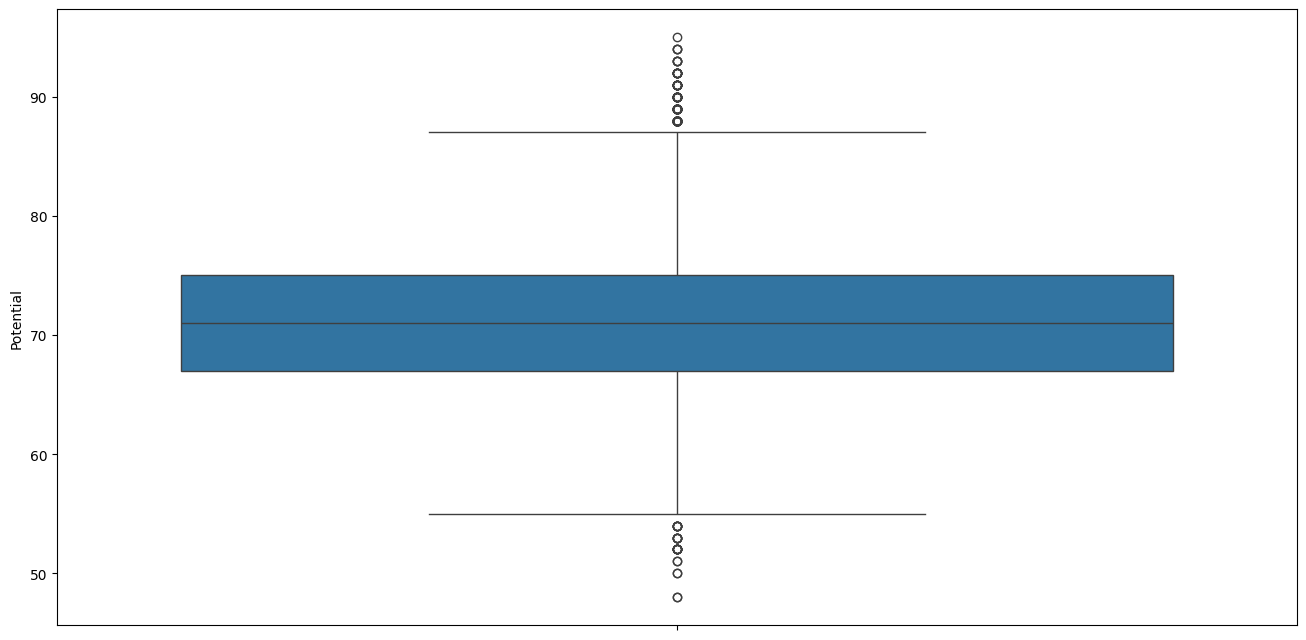

In [37]:
plt.figure(figsize=(16, 8))
sns.boxplot(data['Potential'], whis=1.5)
plt.show()

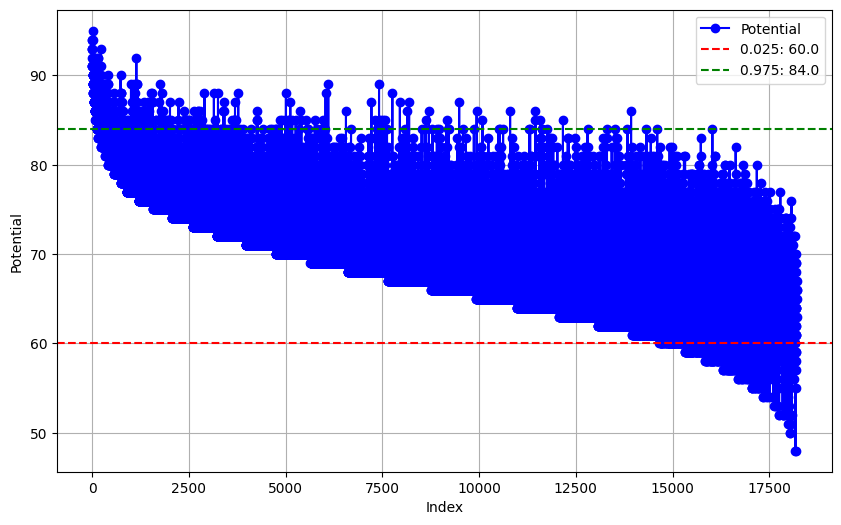

In [38]:
potential = data['Potential']

quantile_025 = np.quantile(potential, 0.025)
quantile_975 = np.quantile(potential, 0.975)

plt.figure(figsize=(10, 6))
plt.plot(potential, marker='o', linestyle='-', color='blue', label='Potential')

plt.axhline(y=quantile_025, color='red', linestyle='--', label=f'0.025: {quantile_025}')
plt.axhline(y=quantile_975, color='green', linestyle='--', label=f'0.975: {quantile_975}')


plt.xlabel('Index')
plt.ylabel('Potential')
plt.legend()

plt.grid(True)
plt.show()

In [39]:

data.isna().sum()


ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [40]:
data.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Skill Moves                 float64
Position                     object
Joined                        int64
Contract Valid Until         object
Height                      float64
Weight                      float64
Release Clause              float64
dtype: object

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [16]:


class DataPipeline:

    def __init__(self):
        self.medians = None
        self.medians = None
        self.MaxDate = None
        self.UnknownClub = None
        self.median_value = None
        self.median_wage = None
        self.median_release_clause = None
        self.median_potential = None


    def fit(self, df):
        self.medians = df[['Value', 'International Reputation','Skill Moves']].median()
        self.MaxDate = pd.to_datetime(df['Contract Valid Until']).max()
        self.UnknownClub = 'Unknown'
        self.median_value = df['Value'].median()
        self.median_wage = df['Wage'].median()
        self.median_release_clause = df['Release Clause'].median()
        self.median_potential = df['Potential'].median()

    def transform(self, df):

        # Выбросы
        total_potential_max = np.quantile(df['Potential'], q=0.975)
        total_potential_min = np.quantile(df['Potential'], q=0.025)
        condition_potential = (df['Potential'] > total_potential_max) | (df['Potential'] < total_potential_min)
        df.loc[condition_potential, 'Potential'] = self.median_potential

        total_value_max = np.quantile(df['Value'], q=0.975)
        total_value_min = np.quantile(df['Value'], q=0.025)
        condition_value = (df['Value'] > total_value_max) | (df['Value'] < total_value_min)
        df.loc[condition_value, 'Value'] = self.median_value

        total_wage_max = np.quantile(df['Wage'], q=0.975)
        total_wage_min = np.quantile(df['Wage'], q=0.025)
        condition_wage = (df['Wage'] > total_wage_max) | (df['Wage'] < total_wage_min)
        df.loc[condition_wage, 'Wage'] = self.median_wage

        total_release_clause_max = np.quantile(df['Release Clause'], q=0.975)
        total_release_clause_min = np.quantile(df['Release Clause'], q=0.025)
        condition_release_clause = (df['Release Clause'] > total_release_clause_max) | (df['Release Clause'] < total_release_clause_min)
        df.loc[condition_release_clause, 'Release Clause'] = self.median_release_clause
        #Заполнение пропусков
        df[['Value', 'International Reputation','Skill Moves']] = df[['Value', 'International Reputation','Skill Moves']].fillna(self.medians)
        df['Contract Valid Until'] = df['Contract Valid Until'].fillna(self.MaxDate)
        df['Club'] = df['Club'].fillna(self.UnknownClub)

        #Оценка рыночной привлекательности
        df['Marketability Score'] = (df['Value'] + df['Wage'] * df['International Reputation']) / 10
        #Возраст достижения пика потенциала
        df['Age at Potential Peak'] = df['Age'] + (df['Potential'] - df['Overall']) / 2
        #Соотношение стоимости к общей оценке
        df['Value-to-Overall Ratio'] = df['Value'] / df['Overall']

        df.drop(columns='ID', inplace=True)
        df = pd.concat([df, pd.get_dummies(df['Preferred Foot'], prefix='Foot')], axis=1)

        return df



# 3. Проверка работы

In [42]:
tempData = data.copy(deep=True)
pipe = DataPipeline()
pipe.fit(tempData)
displayData = pipe.transform(tempData)
data.to_csv('./result.csv', index=False, encoding='utf-8')
displayData

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Joined,Contract Valid Until,Height,Weight,Release Clause,Marketability Score,Age at Potential Peak,Value-to-Overall Ratio,Foot_Left,Foot_Right
0,L. Messi,31,Argentina,94,71,FC Barcelona,110500.0,3.0,Left,5.0,...,2004,2021-01-01,5.583333,159.0,1300.0,11051.5,19.5,1175.531915,True,False
1,Cristiano Ronaldo,33,Portugal,94,71,Juventus,77000.0,3.0,Right,5.0,...,2018,2022-01-01,6.166667,183.0,1300.0,7701.5,21.5,819.148936,False,True
2,Neymar Jr,26,Brazil,92,71,Paris Saint-Germain,118500.0,3.0,Right,5.0,...,2017,2022-01-01,5.750000,150.0,1300.0,11851.5,15.5,1288.043478,False,True
3,De Gea,27,Spain,91,71,Manchester United,72000.0,3.0,Right,4.0,...,2011,2020-01-01,6.333333,168.0,1300.0,7201.2,17.0,791.208791,False,True
4,K. De Bruyne,27,Belgium,91,71,Manchester City,102000.0,3.0,Right,4.0,...,2015,2023-01-01,5.916667,154.0,1300.0,10201.2,17.0,1120.879121,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,...,2017,2019-01-01,5.750000,134.0,143.0,6.1,28.0,1.276596,False,True
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,...,2018,2020-01-01,6.250000,170.0,1300.0,6.1,27.0,1.276596,False,True
18204,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,...,2017,2021-01-01,5.666667,148.0,165.0,6.1,26.0,1.276596,False,True
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,...,2018,2019-01-01,5.833333,154.0,143.0,6.1,26.5,1.276596,False,True


In [43]:
displayData.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause,Marketability Score,Age at Potential Peak,Value-to-Overall Ratio
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,25.122206,66.238699,71.192563,2420.384468,7.028011,1.112924,2.360356,2016.420607,5.946771,165.979129,3262.651129,242.937129,27.599138,32.013893
std,4.669943,6.908930,5.334349,5591.354494,9.780486,0.393554,0.755394,2.018194,0.220514,15.572775,4716.353230,559.762456,3.195118,66.262261
min,16.000000,46.000000,60.000000,10.000000,1.000000,1.000000,1.000000,1991.000000,5.083333,110.000000,130.000000,1.100000,10.500000,0.166667
25%,21.000000,62.000000,67.000000,325.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,626.500000,32.700000,26.000000,5.327869
50%,25.000000,66.000000,71.000000,700.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1300.000000,70.300000,27.000000,10.546875
75%,28.000000,71.000000,75.000000,2000.000000,8.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,4585.060806,200.650000,29.000000,28.169014
max,45.000000,94.000000,84.000000,118500.000000,57.000000,5.000000,5.000000,2018.000000,6.750000,243.000000,28900.000000,11851.500000,55.500000,1288.043478


In [44]:
displayData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Club                      18207 non-null  object 
 6   Value                     18207 non-null  float64
 7   Wage                      18207 non-null  float64
 8   Preferred Foot            18207 non-null  object 
 9   International Reputation  18207 non-null  float64
 10  Skill Moves               18207 non-null  float64
 11  Position                  18207 non-null  object 
 12  Joined                    18207 non-null  int64  
 13  Contract Valid Until      18207 non-null  object 
 14  Height

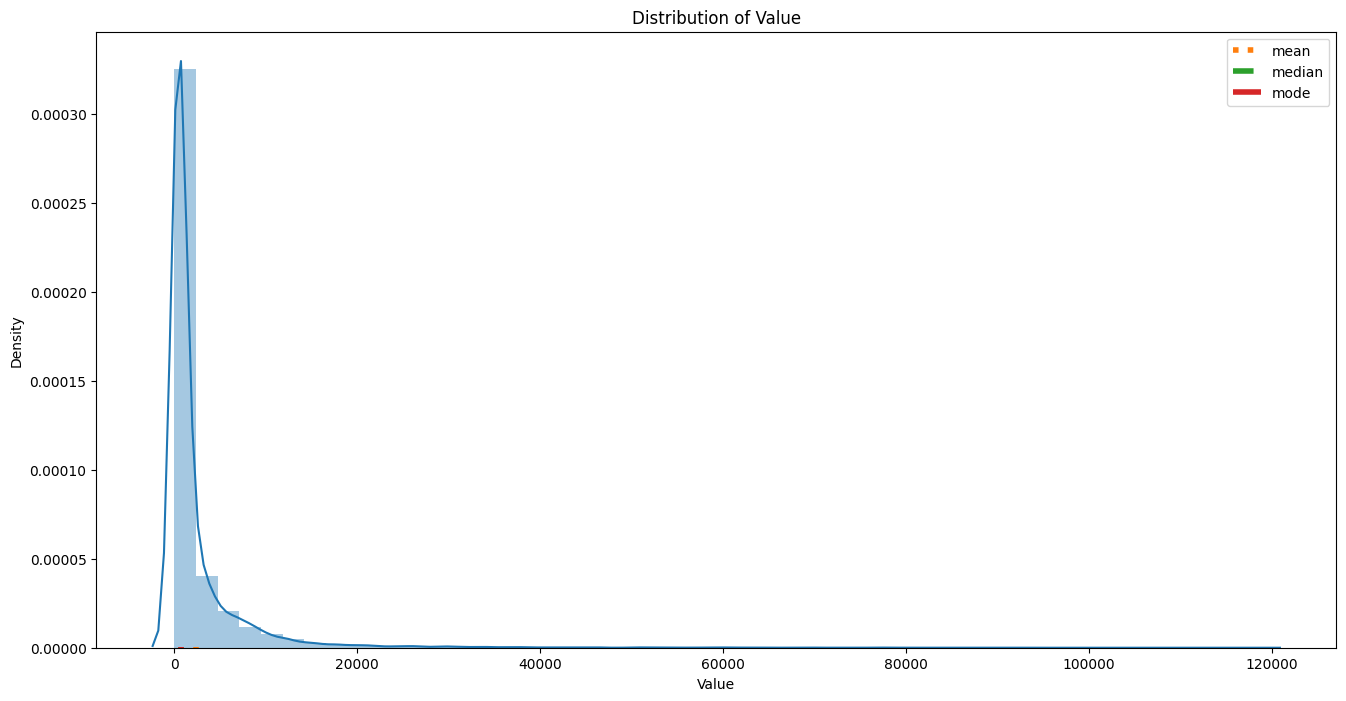

In [45]:
target_mean = round(displayData['Value'].mean(), 3)
target_median = displayData['Value'].median()
target_mode = displayData['Value'].mode()[0]

plt.figure(figsize = (16, 8))

sns.distplot(displayData['Value'], bins=50)

y = np.linspace(0, 0.0000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Value')
plt.legend()
plt.show()


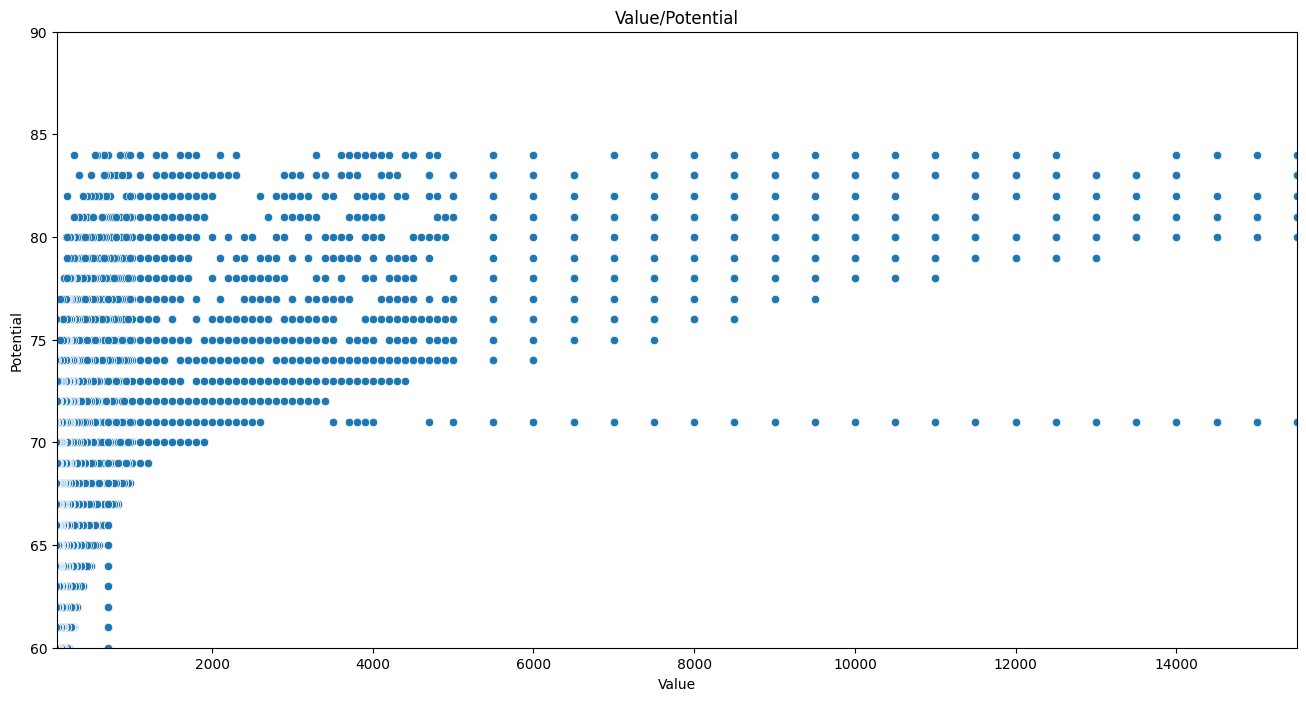

In [46]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Value', y='Potential', data=displayData)
plt.xlim([70, 15500])
plt.ylim([60, 90])
plt.title('Value/Potential')
plt.xlabel('Value')
plt.ylabel('Potential')
plt.show()

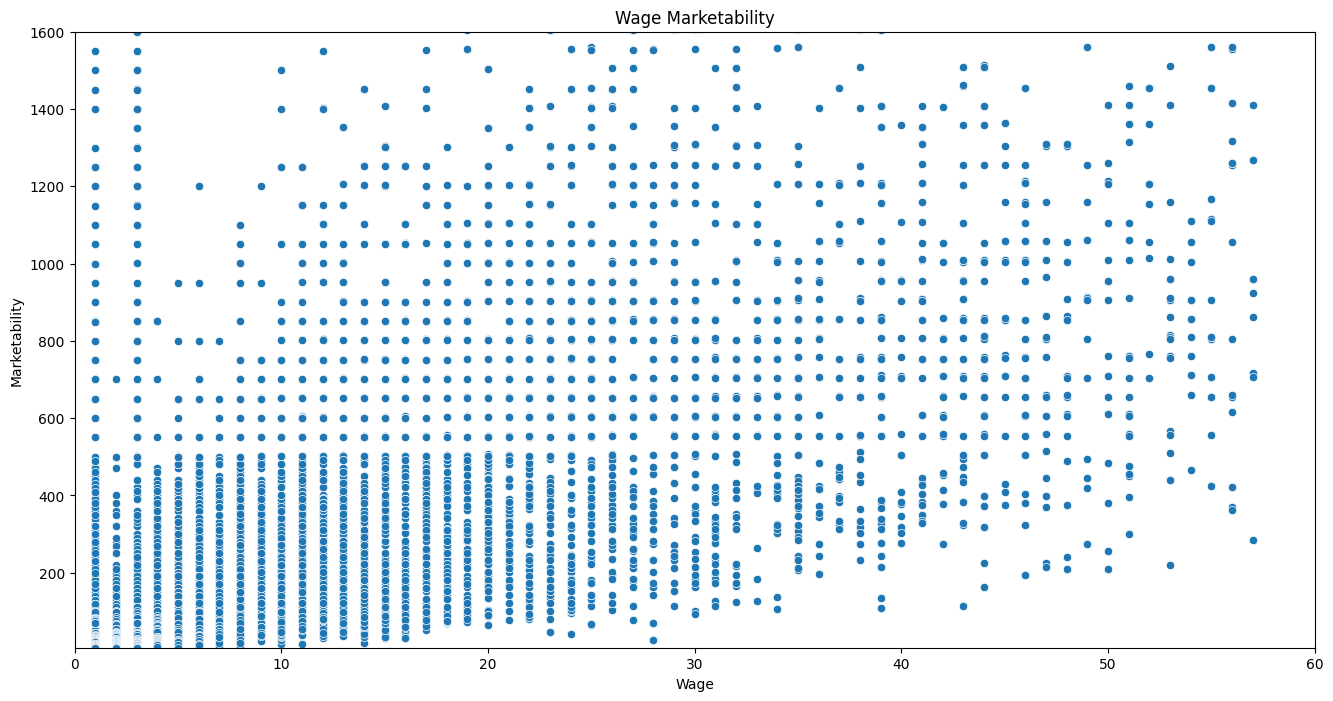

In [22]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Wage', y='Marketability Score', data=displayData)
plt.xlim([0, 60])
plt.ylim([6, 1600])
plt.title('Wage Marketability')
plt.xlabel('Wage')
plt.ylabel('Marketability')
plt.show()

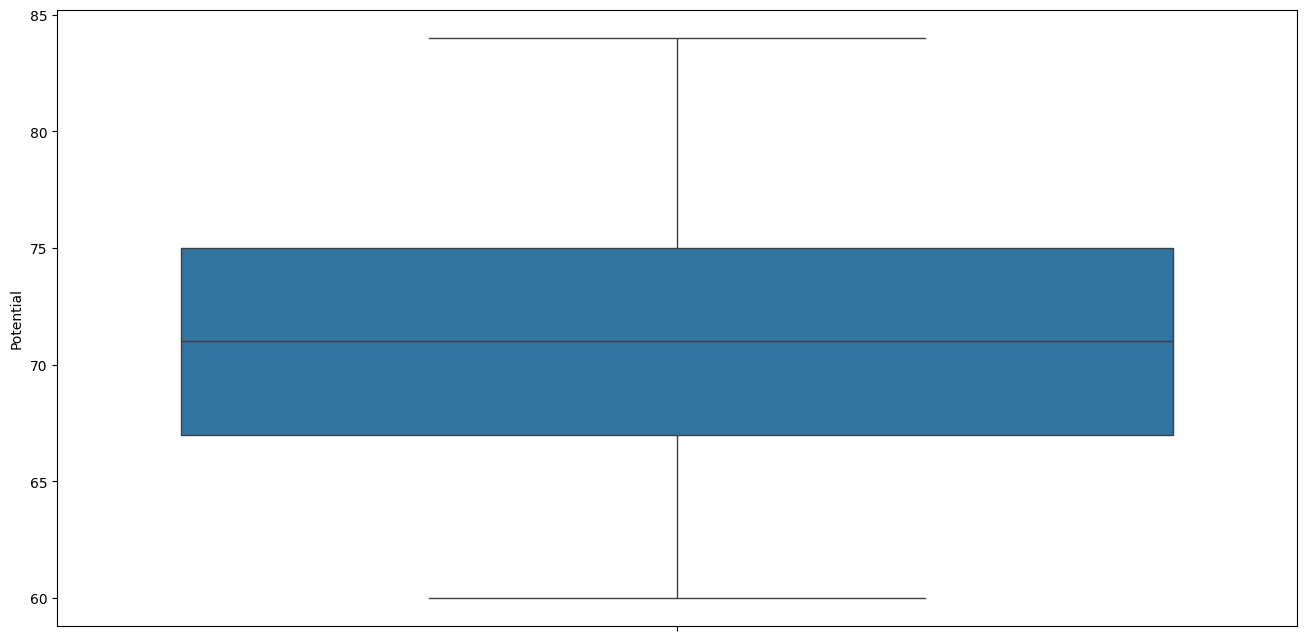

In [23]:
plt.figure(figsize=(16, 8))
sns.boxplot(displayData['Potential'], whis=1.5)
plt.show()

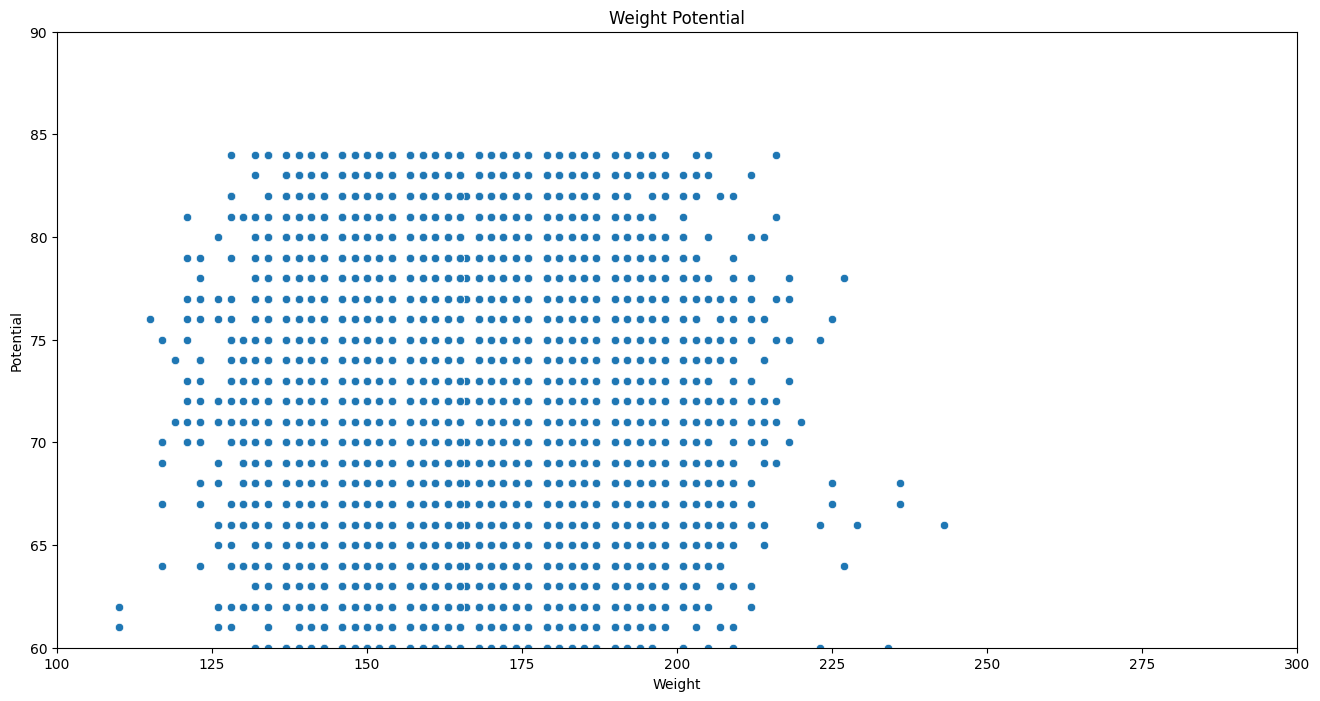

In [47]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Weight', y='Potential', data=displayData)
plt.xlim([100, 300])
plt.ylim([60, 90])
plt.title('Weight Potential')
plt.xlabel('Weight')
plt.ylabel('Potential')
plt.show()

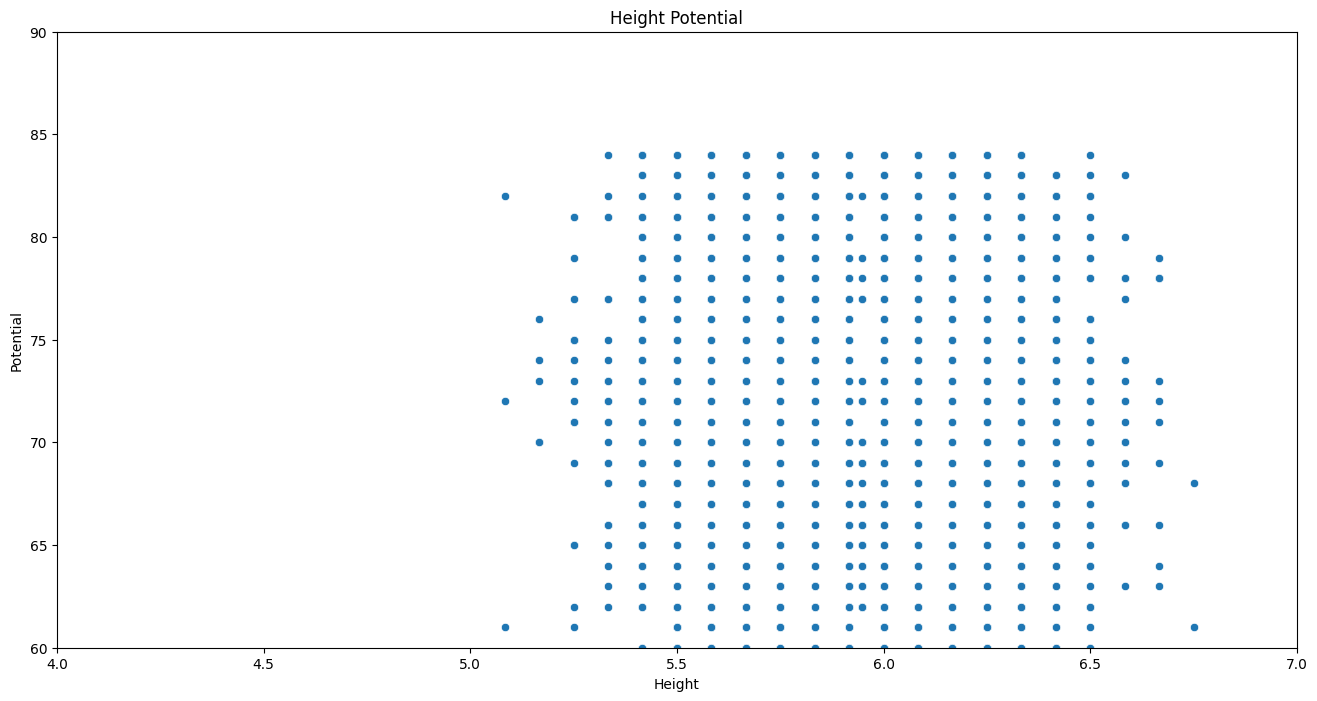

In [48]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Height', y='Potential', data=displayData)
plt.xlim([4, 7])
plt.ylim([60, 90])
plt.title('Height Potential')
plt.xlabel('Height')
plt.ylabel('Potential')
plt.show()

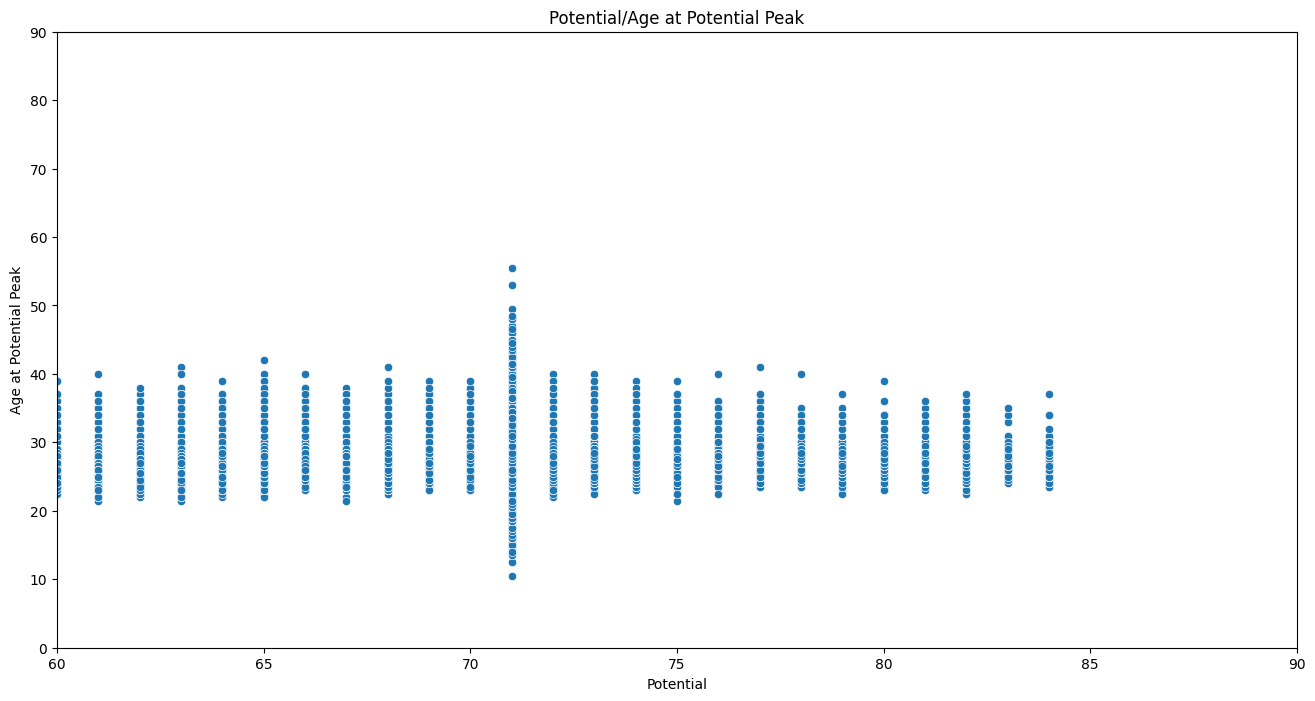

In [26]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Potential', y='Age at Potential Peak', data=displayData)
plt.xlim([60, 90])
plt.ylim([0, 90])
plt.title('Potential/Age at Potential Peak')
plt.xlabel('Potential')
plt.ylabel('Age at Potential Peak')
plt.show()

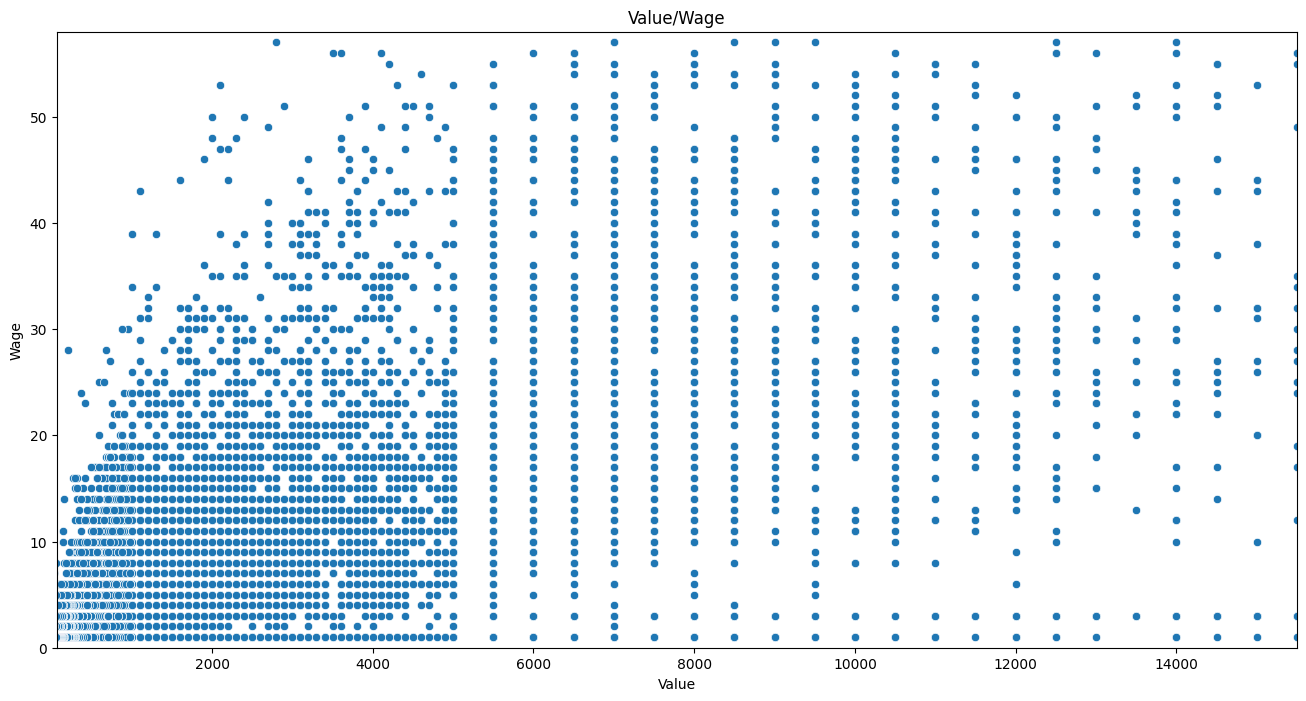

In [27]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Value', y='Wage', data=displayData)
plt.xlim([70, 15500])
plt.ylim([0, 58])
plt.title('Value/Wage')
plt.xlabel('Value')   
plt.ylabel('Wage')
plt.show()